<a href="https://colab.research.google.com/github/lucvseco/spark-dengue/blob/main/dengue_Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

**Iniciar uma sessão local e importar dados:**

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
sc = SparkSession.builder.master('local[*]').getOrCreate()

**Convertendo pra spark**


In [ ]:
dados_spark = sc.read.csv("Dengue2000_2019.csv", header=True)
type(dados_spark)

pyspark.sql.dataframe.DataFrame

**Processamento dos Dados**


In [ ]:
dados_spark.printSchema()

root
 |-- micro_code: string (nullable = true)
 |-- micro_name: string (nullable = true)
 |-- micro_name_ibge: string (nullable = true)
 |-- meso_code: string (nullable = true)
 |-- meso_name: string (nullable = true)
 |-- state_code: string (nullable = true)
 |-- state_name: string (nullable = true)
 |-- region_code: string (nullable = true)
 |-- region_name: string (nullable = true)
 |-- biome_code: string (nullable = true)
 |-- biome_name: string (nullable = true)
 |-- ecozone_code: string (nullable = true)
 |-- ecozone_name: string (nullable = true)
 |-- main_climate: string (nullable = true)
 |-- month: string (nullable = true)
 |-- year: string (nullable = true)
 |-- time: string (nullable = true)
 |-- dengue_cases: string (nullable = true)
 |-- population: string (nullable = true)
 |-- pop_density: string (nullable = true)
 |-- tmax: string (nullable = true)
 |-- tmin: string (nullable = true)
 |-- pdsi: string (nullable = true)
 |-- urban: string (nullable = true)
 |-- water_ne

In [ ]:
df_transformado = dados_spark \
    .withColumn("micro_code", col("micro_code").cast(IntegerType())) \
    .withColumn("meso_code", col("meso_code").cast(IntegerType())) \
    .withColumn("state_code", col("state_code").cast(IntegerType())) \
    .withColumn("region_code", col("region_code").cast(IntegerType())) \
    .withColumn("biome_code", col("biome_code").cast(IntegerType())) \
    .withColumn("ecozone_code", col("ecozone_code").cast(IntegerType())) \
    .withColumn("month", col("month").cast(IntegerType())) \
    .withColumn("year", col("year").cast(IntegerType())) \
    .withColumn("dengue_cases", col("dengue_cases").cast(IntegerType())) \
    .withColumn("population", col("population").cast(FloatType())) \
    .withColumn("pop_density", col("pop_density").cast(FloatType())) \
    .withColumn("tmax", col("tmax").cast(FloatType())) \
    .withColumn("tmin", col("tmin").cast(FloatType())) \
    .withColumn("pdsi", col("pdsi").cast(FloatType())) \
    .withColumn("urban", col("urban").cast(FloatType())) \
    .withColumn("water_network", col("water_network").cast(FloatType())) \
    .withColumn("water_shortage", col("water_shortage").cast(FloatType()))


In [ ]:
# Convertendo colunas para português
traducao = {
    "micro_code": "codigo_micro",
    "micro_name": "nome_micro",
    "micro_name_ibge": "nome_micro_ibge",
    "meso_code": "codigo_meso",
    "meso_name": "nome_meso",
    "state_code": "codigo_estado",
    "state_name": "nome_estado",
    "region_code": "codigo_regiao",
    "region_name": "nome_regiao",
    "biome_code": "codigo_bioma",
    "biome_name": "nome_bioma",
    "ecozone_code": "codigo_ecozona",
    "ecozone_name": "nome_ecozona",
    "main_climate": "clima_principal",
    "month": "mes",
    "year": "ano",
    "time": "hora",
    "dengue_cases": "casos_dengue",
    "population": "populacao",
    "pop_density": "densidade_pop",
    "tmax": "temp_max",
    "tmin": "temp_min",
    "pdsi": "pdsi",
    "urban": "urbano",
    "water_network": "rede_agua",
    "water_shortage": "falta_agua"
}

df_traduzido = df_transformado.select([col(old).alias(new) for old, new in traducao.items()])

In [ ]:
# Tirar o ano 2000
df_exemplo = df_traduzido.filter(df_traduzido.ano != 2000)

In [ ]:
df_exemplo.show()

+------------+----------------+-----------------+-----------+-------------------+-------------+-----------+-------------+-----------+------------+----------+--------------+------------+---------------+---+----+----+------------+---------+-------------+---------+---------+------------+------+---------+----------+
|codigo_micro|      nome_micro|  nome_micro_ibge|codigo_meso|          nome_meso|codigo_estado|nome_estado|codigo_regiao|nome_regiao|codigo_bioma|nome_bioma|codigo_ecozona|nome_ecozona|clima_principal|mes| ano|hora|casos_dengue|populacao|densidade_pop| temp_max| temp_min|        pdsi|urbano|rede_agua|falta_agua|
+------------+----------------+-----------------+-----------+-------------------+-------------+-----------+-------------+-----------+------------+----------+--------------+------------+---------------+---+----+----+------------+---------+-------------+---------+---------+------------+------+---------+----------+
|       11001|     Porto Velho|      PORTO VELHO|       11

In [ ]:
# Transformando valores nulos em 0
df_final = df_exemplo.fillna(0)


In [ ]:
df_final.select("ano").distinct().show()

+----+
| ano|
+----+
|2003|
|2007|
|2006|
|2004|
|2009|
|2001|
|2005|
|2010|
|2011|
|2008|
|2002|
|2018|
|2015|
|2013|
|2014|
|2019|
|2012|
|2016|
|2017|
+----+



In [ ]:
# Verificando Dados faltantes
df_final.select([count(when(isnull(c), c)).alias(c) for c in df_final.columns]).show()

+------------+----------+---------------+-----------+---------+-------------+-----------+-------------+-----------+------------+----------+--------------+------------+---------------+---+---+----+------------+---------+-------------+--------+--------+----+------+---------+----------+
|codigo_micro|nome_micro|nome_micro_ibge|codigo_meso|nome_meso|codigo_estado|nome_estado|codigo_regiao|nome_regiao|codigo_bioma|nome_bioma|codigo_ecozona|nome_ecozona|clima_principal|mes|ano|hora|casos_dengue|populacao|densidade_pop|temp_max|temp_min|pdsi|urbano|rede_agua|falta_agua|
+------------+----------+---------------+-----------+---------+-------------+-----------+-------------+-----------+------------+----------+--------------+------------+---------------+---+---+----+------------+---------+-------------+--------+--------+----+------+---------+----------+
|           0|         0|              0|          0|        0|            0|          0|            0|          0|           0|         0|      

In [ ]:
#Adicionando nova coluna
df_final = df_final.withColumn("casos_dengue", col("casos_dengue").cast("int"))
df_final = df_final.withColumn("populacao", col("populacao").cast("int"))

# Criando a coluna "taxa_dengue_per_mil"
df_final = df_final.withColumn("taxa_dengue_per_mil", (col("casos_dengue") / col("populacao")) * 1000)


**Exploração dos dados**

In [ ]:
# Verificando o dataset
df_final.show(5)

+------------+----------------+----------------+-----------+-----------------+-------------+-----------+-------------+-----------+------------+----------+--------------+------------+---------------+---+----+----+------------+---------+-------------+---------+---------+------------+------+---------+----------+--------------------+
|codigo_micro|      nome_micro| nome_micro_ibge|codigo_meso|        nome_meso|codigo_estado|nome_estado|codigo_regiao|nome_regiao|codigo_bioma|nome_bioma|codigo_ecozona|nome_ecozona|clima_principal|mes| ano|hora|casos_dengue|populacao|densidade_pop| temp_max| temp_min|        pdsi|urbano|rede_agua|falta_agua| taxa_dengue_per_mil|
+------------+----------------+----------------+-----------+-----------------+-------------+-----------+-------------+-----------+------------+----------+--------------+------------+---------------+---+----+----+------------+---------+-------------+---------+---------+------------+------+---------+----------+--------------------+
|   

In [ ]:
#Retornar o número de linhas
df_final.count()

127224

In [ ]:
#Selecionar colunas
df2 = df_final.select("nome_micro","nome_estado","casos_dengue","densidade_pop","taxa_dengue_per_mil").show(5)

+----------------+-----------+------------+-------------+--------------------+
|      nome_micro|nome_estado|casos_dengue|densidade_pop| taxa_dengue_per_mil|
+----------------+-----------+------------+-------------+--------------------+
|     Porto Velho|   Rondônia|         267|     6.503234|  0.6258203637727358|
|Guajar<e1>-Mirim|   Rondônia|          12|    1.5045772| 0.19569152492620798|
|       Ariquemes|   Rondônia|           2|     5.903734|0.013907335424069425|
|    Ji-Paran<e1>|   Rondônia|          93|    12.241386|  0.3030342526458475|
|Alvorada D'Oeste|   Rondônia|           1|    4.6582503|0.013430029546065002|
+----------------+-----------+------------+-------------+--------------------+
only showing top 5 rows



In [ ]:
# Total de casos por ano
df_final.groupBy("ano").agg(sum("casos_dengue").alias("total_cases")).orderBy(desc("total_cases")).show()

+----+-----------+
| ano|total_cases|
+----+-----------+
|2015|    1700248|
|2019|    1558424|
|2016|    1514749|
|2013|    1432606|
|2010|     985469|
|2002|     701787|
|2011|     689266|
|2014|     593677|
|2012|     581790|
|2008|     561637|
|2007|     500379|
|2009|     411714|
|2001|     386310|
|2003|     278940|
|2006|     266356|
|2018|     265440|
|2017|     243240|
|2005|     150973|
|2004|      72288|
+----+-----------+



In [ ]:
# Principais estatísticas
df_final.describe('casos_dengue').show(5)

+-------+-----------------+
|summary|     casos_dengue|
+-------+-----------------+
|  count|           127224|
|   mean| 101.358965289568|
| stddev|971.1928883996341|
|    min|                0|
|    max|            88821|
+-------+-----------------+



In [ ]:
# Ocorrências em uma variável
df_final.select("nome_regiao").distinct().show()

+-----------+
|nome_regiao|
+-----------+
|      South|
|  Southeast|
|Centre-West|
|      North|
|  Northeast|
+-----------+



In [ ]:
# Total de casos por região
df_final.groupBy("nome_regiao").agg(sum("casos_dengue").alias("total_cases")).orderBy(desc("total_cases")).show()

+-----------+-----------+
|nome_regiao|total_cases|
+-----------+-----------+
|  Southeast|    6697802|
|  Northeast|    2995127|
|Centre-West|    1997674|
|      North|     807274|
|      South|     397416|
+-----------+-----------+



Qual mesorregião foi mais contaminada?

In [ ]:
estados_mais_casos = df_final.groupBy('nome_meso').agg(sum('casos_dengue')).orderBy(sum('casos_dengue').desc()).show(10)

+--------------------+-----------------+
|           nome_meso|sum(casos_dengue)|
+--------------------+-----------------+
|Metropolitana De ...|          1087032|
|Metropolitana Do ...|          1057043|
|       Centro Goiano|           811462|
|Metropolitana De ...|           508369|
|            Campinas|           397921|
|      Ribeirão Preto|           348374|
|São José Do Rio P...|           332038|
|Metropolitana De ...|           328754|
|Central Espírito-...|           291561|
|Triângulo Mineiro...|           259855|
+--------------------+-----------------+
only showing top 10 rows



Quanto cada estado teve casos?

In [ ]:
estado_casos = df_final.groupBy('nome_estado').agg(sum('taxa_dengue_per_mil')).orderBy(sum('taxa_dengue_per_mil').desc()).show()

+-------------------+------------------------+
|        nome_estado|sum(taxa_dengue_per_mil)|
+-------------------+------------------------+
|          São Paulo|       5431.474721696108|
|       Minas Gerais|       5417.223710983585|
|        Mato Grosso|       2344.584807822586|
|              Goiás|       2061.634183829219|
|Rio Grande Do Norte|      1937.0807056964532|
|              Ceará|      1887.7183735981594|
|     Rio De Janeiro|      1685.8655713071835|
|             Paraná|      1654.1998629220118|
|              Bahia|      1602.9772453853159|
| Mato Grosso Do Sul|      1537.3403474910187|
|         Pernambuco|      1446.0019781411486|
|            Paraíba|       1425.423652186212|
|     Espírito Santo|      1284.9928165321207|
|            Alagoas|       748.4996168845358|
|               Acre|       717.2941714107812|
|          Tocantins|       650.0090091608924|
|               Pará|       618.6170522918949|
|           Rondônia|       611.6404423541699|
|            

Total de casos por estato e bioma no ano de 2019


In [ ]:
casos_ano = df_final.filter(df_final.ano == 2019)
casos = casos_ano.groupBy('nome_estado','rede_agua').agg(sum('casos_dengue')).orderBy(sum('casos_dengue').desc()).show()

+-------------------+---------+-----------------+
|        nome_estado|rede_agua|sum(casos_dengue)|
+-------------------+---------+-----------------+
|       Minas Gerais|    97.88|           270469|
|              Goiás|    81.82|            57458|
|          São Paulo|    89.21|            52997|
|          São Paulo|    96.78|            46200|
|   Distrito Federal|    94.82|            38635|
|       Minas Gerais|    95.13|            36824|
|     Espírito Santo|    97.59|            34174|
|          São Paulo|    95.65|            33017|
|          São Paulo|    95.49|            31392|
| Mato Grosso Do Sul|    88.13|            28924|
|          São Paulo|    97.68|            21921|
|          São Paulo|    98.81|            21888|
|     Rio De Janeiro|    86.81|            21797|
|Rio Grande Do Norte|    97.63|            17947|
|              Bahia|    74.34|            17637|
|       Minas Gerais|    85.25|            15996|
|              Goiás|    80.85|            15096|


In [ ]:
casos_ano = df_final.filter(df_final.ano == 2019)
casos = casos_ano.groupBy('nome_estado','falta_agua').agg(sum('casos_dengue')).orderBy(sum('casos_dengue').desc()).show()

+-------------------+----------+-----------------+
|        nome_estado|falta_agua|sum(casos_dengue)|
+-------------------+----------+-----------------+
|       Minas Gerais|    0.3237|           270469|
|              Goiás|    0.5752|            57458|
|          São Paulo|    0.5449|            52997|
|          São Paulo|    0.4747|            46200|
|   Distrito Federal|     0.873|            38635|
|       Minas Gerais|    0.2444|            36824|
|     Espírito Santo|    0.5413|            34174|
|          São Paulo|    0.5612|            33444|
|          São Paulo|    0.3958|            33017|
| Mato Grosso Do Sul|    0.1855|            28924|
|Rio Grande Do Norte|       0.0|            21984|
|          São Paulo|    0.4965|            21921|
|          São Paulo|    0.5917|            21888|
|     Rio De Janeiro|    0.5347|            21797|
|         Pernambuco|    0.0873|            19888|
|              Bahia|    0.5856|            17637|
|       Minas Gerais|    0.4405

In [ ]:
# Spark para Pandas
df_final = df_final.toPandas()

# Salvar resultado
df_final.to_csv("dados_pandas.csv")

In [ ]:
df_final.head()

,codigo_micro,nome_micro,nome_micro_ibge,codigo_meso,nome_meso,codigo_estado,nome_estado,codigo_regiao,nome_regiao,codigo_bioma,...,casos_dengue,populacao,densidade_pop,temp_max,temp_min,pdsi,urbano,rede_agua,falta_agua,taxa_dengue_per_mil
0,11001,Porto Velho,PORTO VELHO,1101,Madeira-Guaporé,11,Rondônia,1,North,5,...,267,426640,6.503234,30.180363,21.471796,-0.311743,85.199997,33.57,0.2245,0.625820
1,11002,Guajar<e1>-Mirim,GUAJARÁ-MIRIM,1101,Madeira-Guaporé,11,Rondônia,1,North,5,...,12,61321,1.504577,30.369087,21.300480,-0.803746,72.309998,27.43,0.0873,0.195692
2,11003,Ariquemes,ARIQUEMES,1102,Leste Rondoniense,11,Rondônia,1,North,5,...,2,143809,5.903734,30.084492,21.183846,-0.022145,66.910004,27.76,0.1871,0.013907
3,11004,Ji-Paran<e1>,JI-PARANÁ,1102,Leste Rondoniense,11,Rondônia,1,North,5,...,93,306896,12.241386,29.946037,20.736881,-0.269979,68.680000,32.23,0.2381,0.303034
4,11005,Alvorada D'Oeste,ALVORADA D'OESTE,1102,Leste Rondoniense,11,Rondônia,1,North,5,...,1,74460,4.658250,29.965841,20.655041,-1.247326,42.820000,21.40,0.2837,0.013430


In [ ]:
df_final = sc.read.csv('dados_pandas.csv', header=True, sep=",",  inferSchema=True)
df_final.show(5, False)

+---+------------+----------------+----------------+-----------+-----------------+-------------+-----------+-------------+-----------+------------+----------+--------------+------------+---------------+---+----+----+------------+---------+-------------+---------+---------+------------+------+---------+----------+--------------------+
|_c0|codigo_micro|nome_micro      |nome_micro_ibge |codigo_meso|nome_meso        |codigo_estado|nome_estado|codigo_regiao|nome_regiao|codigo_bioma|nome_bioma|codigo_ecozona|nome_ecozona|clima_principal|mes|ano |hora|casos_dengue|populacao|densidade_pop|temp_max |temp_min |pdsi        |urbano|rede_agua|falta_agua|taxa_dengue_per_mil |
+---+------------+----------------+----------------+-----------+-----------------+-------------+-----------+-------------+-----------+------------+----------+--------------+------------+---------------+---+----+----+------------+---------+-------------+---------+---------+------------+------+---------+----------+--------------

In [ ]:
df_final.show(5, truncate=True)

+---+------------+----------------+----------------+-----------+-----------------+-------------+-----------+-------------+-----------+------------+----------+--------------+------------+---------------+---+----+----+------------+---------+-------------+---------+---------+------------+------+---------+----------+--------------------+
|_c0|codigo_micro|      nome_micro| nome_micro_ibge|codigo_meso|        nome_meso|codigo_estado|nome_estado|codigo_regiao|nome_regiao|codigo_bioma|nome_bioma|codigo_ecozona|nome_ecozona|clima_principal|mes| ano|hora|casos_dengue|populacao|densidade_pop| temp_max| temp_min|        pdsi|urbano|rede_agua|falta_agua| taxa_dengue_per_mil|
+---+------------+----------------+----------------+-----------+-----------------+-------------+-----------+-------------+-----------+------------+----------+--------------+------------+---------------+---+----+----+------------+---------+-------------+---------+---------+------------+------+---------+----------+--------------

In [ ]:
df_final.select(col('casos_dengue')).show(10)

+------------+
|casos_dengue|
+------------+
|         267|
|          12|
|           2|
|          93|
|           1|
|          14|
|         271|
|           8|
|           1|
|           0|
+------------+
only showing top 10 rows



In [ ]:
total_contagem = df_final.count()
print("TOTAL Contagem: " + str(total_contagem)+'\n')

ano_2013_contagem = df_final.filter(col('ano')==2013).count()
print("2013 Contagem: " + str(ano_2013_contagem)+'\n')

base_2013 = df_final.filter(col('ano')==2013).show(truncate=False)

TOTAL Contagem: 127224

2013 Contagem: 6696

+-----+------------+----------------+-----------------+-----------+-------------------+-------------+-----------+-------------+-----------+------------+----------+--------------+------------+---------------+---+----+----+------------+---------+-------------+---------+---------+-----------+------+---------+----------+--------------------+
|_c0  |codigo_micro|nome_micro      |nome_micro_ibge  |codigo_meso|nome_meso          |codigo_estado|nome_estado|codigo_regiao|nome_regiao|codigo_bioma|nome_bioma|codigo_ecozona|nome_ecozona|clima_principal|mes|ano |hora|casos_dengue|populacao|densidade_pop|temp_max |temp_min |pdsi       |urbano|rede_agua|falta_agua|taxa_dengue_per_mil |
+-----+------------+----------------+-----------------+-----------+-------------------+-------------+-----------+-------------+-----------+------------+----------+--------------+------------+---------------+---+----+----+------------+---------+-------------+---------+-------

In [ ]:
ano_2013_casos = df_final.filter((col('ano')==2013) &
                                  (col('casos_dengue')>10000)).count()

print("2022 Contagem:" + str(ano_2013_casos)+'\n')

df_final.filter((col('ano')==2013) &
                              (col('casos_dengue')>10000)).show(truncate=False)

2022 Contagem:19

+-----+------------+--------------+---------------+-----------+----------------------------------+-------------+------------------+-------------+-----------+------------+-------------------+--------------+----------------------+---------------+---+----+----+------------+---------+-------------+---------+---------+-----------+------+---------+----------+-------------------+
|_c0  |codigo_micro|nome_micro    |nome_micro_ibge|codigo_meso|nome_meso                         |codigo_estado|nome_estado       |codigo_regiao|nome_regiao|codigo_bioma|nome_bioma         |codigo_ecozona|nome_ecozona          |clima_principal|mes|ano |hora|casos_dengue|populacao|densidade_pop|temp_max |temp_min |pdsi       |urbano|rede_agua|falta_agua|taxa_dengue_per_mil|
+-----+------------+--------------+---------------+-----------+----------------------------------+-------------+------------------+-------------+-----------+------------+-------------------+--------------+----------------------+--

In [ ]:
df_final.select('ano').distinct().show()

+----+
| ano|
+----+
|2003|
|2007|
|2006|
|2004|
|2012|
|2009|
|2001|
|2005|
|2010|
|2011|
|2008|
|2002|
|2018|
|2015|
|2013|
|2014|
|2019|
|2016|
|2017|
+----+



In [ ]:
df = df_final
df.orderBy('ano').show(truncate=False)

+---+------------+----------------+-----------------+-----------+-------------------+-------------+-----------+-------------+-----------+------------+----------+--------------+------------+---------------+---+----+----+------------+---------+-------------+---------+---------+------------+------+---------+----------+--------------------+
|_c0|codigo_micro|nome_micro      |nome_micro_ibge  |codigo_meso|nome_meso          |codigo_estado|nome_estado|codigo_regiao|nome_regiao|codigo_bioma|nome_bioma|codigo_ecozona|nome_ecozona|clima_principal|mes|ano |hora|casos_dengue|populacao|densidade_pop|temp_max |temp_min |pdsi        |urbano|rede_agua|falta_agua|taxa_dengue_per_mil |
+---+------------+----------------+-----------------+-----------+-------------------+-------------+-----------+-------------+-----------+------------+----------+--------------+------------+---------------+---+----+----+------------+---------+-------------+---------+---------+------------+------+---------+----------+-----

In [ ]:
df_pandas = df.toPandas()

In [ ]:
df_pandas.head()

,_c0,codigo_micro,nome_micro,nome_micro_ibge,codigo_meso,nome_meso,codigo_estado,nome_estado,codigo_regiao,nome_regiao,...,casos_dengue,populacao,densidade_pop,temp_max,temp_min,pdsi,urbano,rede_agua,falta_agua,taxa_dengue_per_mil
0,0,11001,Porto Velho,PORTO VELHO,1101,Madeira-Guaporé,11,Rondônia,1,North,...,267,426640,6.503234,30.180363,21.471796,-0.311743,85.20,33.57,0.2245,0.625820
1,1,11002,Guajar<e1>-Mirim,GUAJARÁ-MIRIM,1101,Madeira-Guaporé,11,Rondônia,1,North,...,12,61321,1.504577,30.369087,21.300480,-0.803746,72.31,27.43,0.0873,0.195692
2,2,11003,Ariquemes,ARIQUEMES,1102,Leste Rondoniense,11,Rondônia,1,North,...,2,143809,5.903734,30.084492,21.183846,-0.022145,66.91,27.76,0.1871,0.013907
3,3,11004,Ji-Paran<e1>,JI-PARANÁ,1102,Leste Rondoniense,11,Rondônia,1,North,...,93,306896,12.241386,29.946037,20.736881,-0.269979,68.68,32.23,0.2381,0.303034
4,4,11005,Alvorada D'Oeste,ALVORADA D'OESTE,1102,Leste Rondoniense,11,Rondônia,1,North,...,1,74460,4.658250,29.965841,20.655040,-1.247326,42.82,21.40,0.2837,0.013430


In [ ]:
df_pandas.dtypes

_c0                      int32
codigo_micro             int32
nome_micro              object
nome_micro_ibge         object
codigo_meso              int32
nome_meso               object
codigo_estado            int32
nome_estado             object
codigo_regiao            int32
nome_regiao             object
codigo_bioma             int32
nome_bioma              object
codigo_ecozona           int32
nome_ecozona            object
clima_principal         object
mes                      int32
ano                      int32
hora                     int32
casos_dengue             int32
populacao                int32
densidade_pop          float64
temp_max               float64
temp_min               float64
pdsi                   float64
urbano                 float64
rede_agua              float64
falta_agua             float64
taxa_dengue_per_mil    float64
dtype: object

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

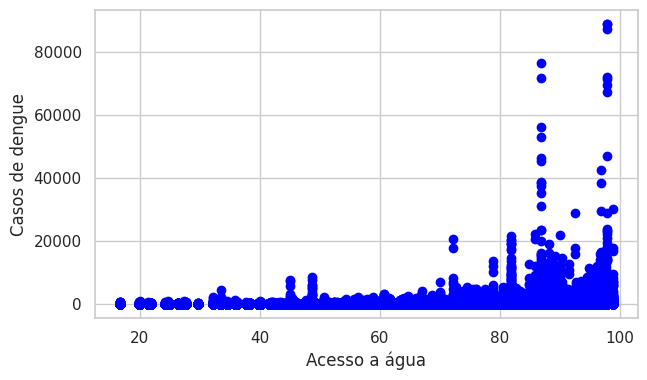

In [ ]:
# Plotando dispersão de dados = relacionando duas variáveis numéricas.
plt.figure(figsize = (7,4))
plt.scatter(
    df_pandas['rede_agua'],
    df_pandas['casos_dengue'],
    c='blue')

plt.xlabel("Acesso a água")
plt.ylabel("Casos de dengue")
plt.show()

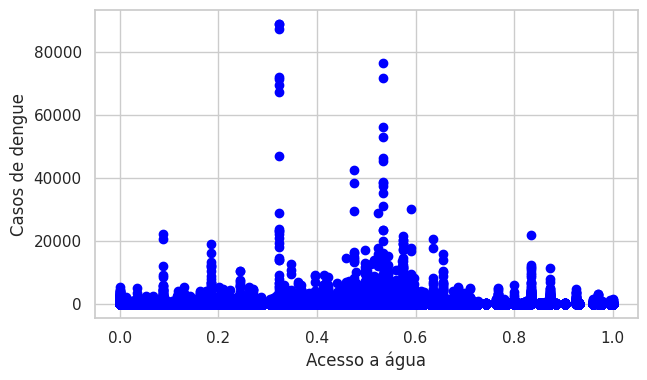

In [ ]:
# Plotando dispersão de dados = relacionando duas variáveis numéricas.
plt.figure(figsize = (7,4))
plt.scatter(
    df_pandas['falta_agua'],
    df_pandas['casos_dengue'],
    c='blue')

plt.xlabel("Acesso a água")
plt.ylabel("Casos de dengue")
plt.show()

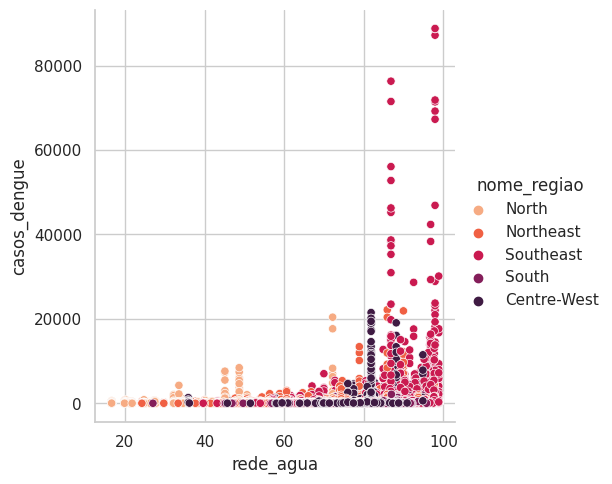

In [ ]:
# Grafico gerado entre rede de água, casos de dengue e região.
sns.relplot(
    data=df_pandas,
    x="rede_agua", y="casos_dengue", hue="nome_regiao", palette="rocket_r")
plt.show()

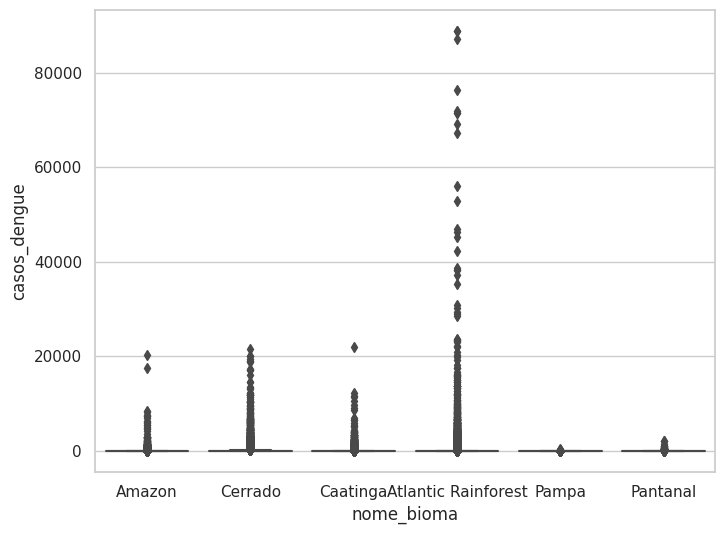

In [ ]:
# Plotar o boxplot de uma variável em relação as classes com seaborn.

plt.subplots( figsize=(8, 6))
sns.boxplot(x='nome_bioma', y='casos_dengue', data=df_pandas)
plt.show()

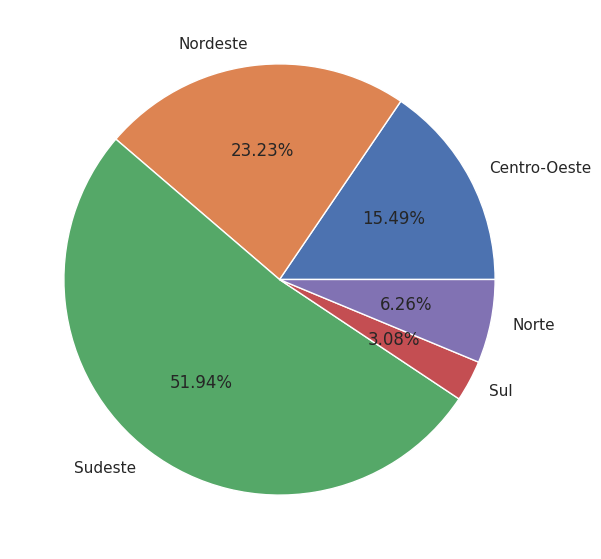

In [ ]:
# Verifcando categorias ou classes
classes_tipos_terremotos = df_pandas['nome_regiao'].value_counts()
nome_classes = ['Centro-Oeste','Nordeste','Sudeste','Sul','Norte']
quantidade_classes = [1997674.0,2995127.0,6697802.0,397416.0,807274.0]
fig = plt.figure(figsize =(7, 7))
plt.pie(quantidade_classes, labels = nome_classes, autopct='%1.2f%%')
plt.show()

In [ ]:
df.groupBy("ano").agg(sum("casos_dengue")).show()

+----+-----------------+
| ano|sum(casos_dengue)|
+----+-----------------+
|2003|           278940|
|2007|           500379|
|2006|           266356|
|2004|            72288|
|2012|           581790|
|2009|           411714|
|2001|           386310|
|2005|           150973|
|2010|           985469|
|2011|           689266|
|2008|           561637|
|2002|           701787|
|2018|           265440|
|2015|          1700248|
|2013|          1432606|
|2014|           593677|
|2019|          1558424|
|2016|          1514749|
|2017|           243240|
+----+-----------------+



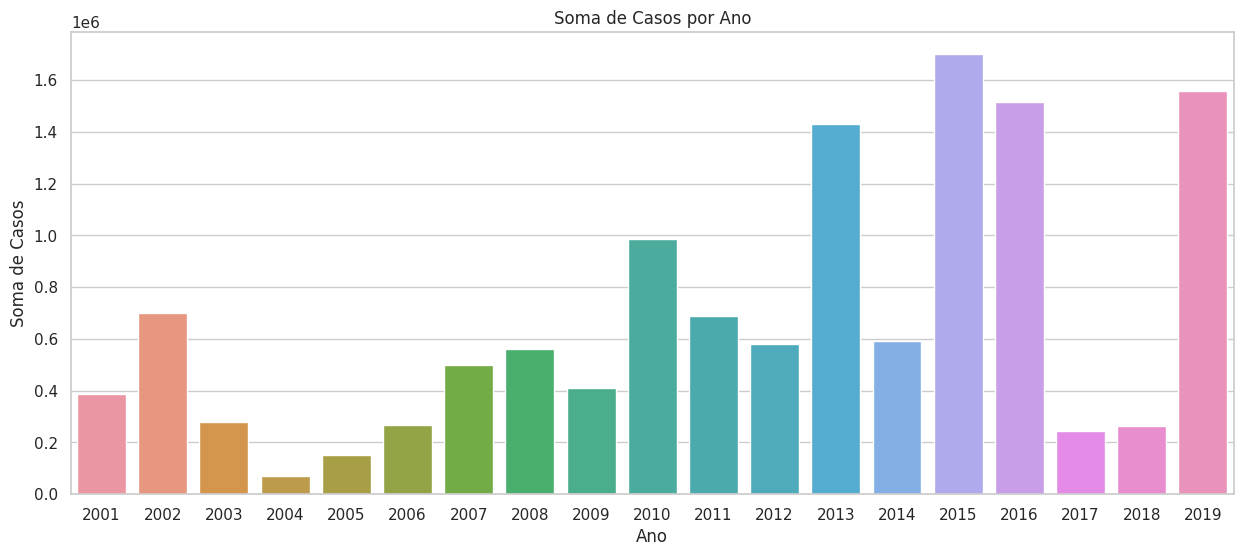

In [ ]:
# Filtrando os dados para o período desejado
df1 = df_pandas
soma_casos_por_ano = df1.groupby('ano')['casos_dengue'].sum().reset_index()
soma_casos_por_ano = soma_casos_por_ano.sort_values('casos_dengue', ascending=False)

# Configurando o estilo
sns.set(style="whitegrid")

# Criando o gráfico de barras
plt.figure(figsize=(15, 6))
sns.barplot(x='ano', y='casos_dengue', data=soma_casos_por_ano)
plt.title('Soma de Casos por Ano')
plt.xlabel('Ano')
plt.ylabel('Soma de Casos')
plt.show()

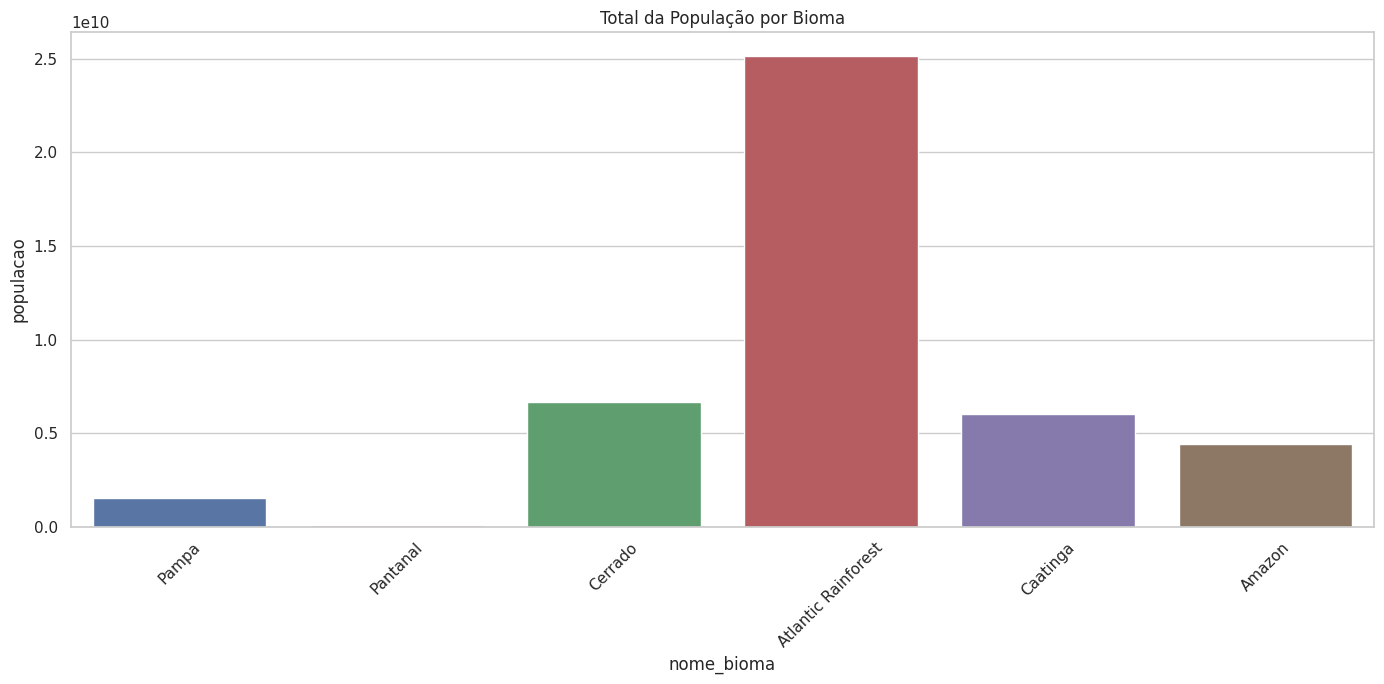

In [ ]:
bioma_grouped = df.groupby("nome_bioma").agg(sum("populacao").alias("populacao"))
bioma_df = bioma_grouped.toPandas()
#Plotando
plt.figure(figsize=(14,7))
sns.barplot(x="nome_bioma", y="populacao", data=bioma_df)
plt.title("Total da População por Bioma")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

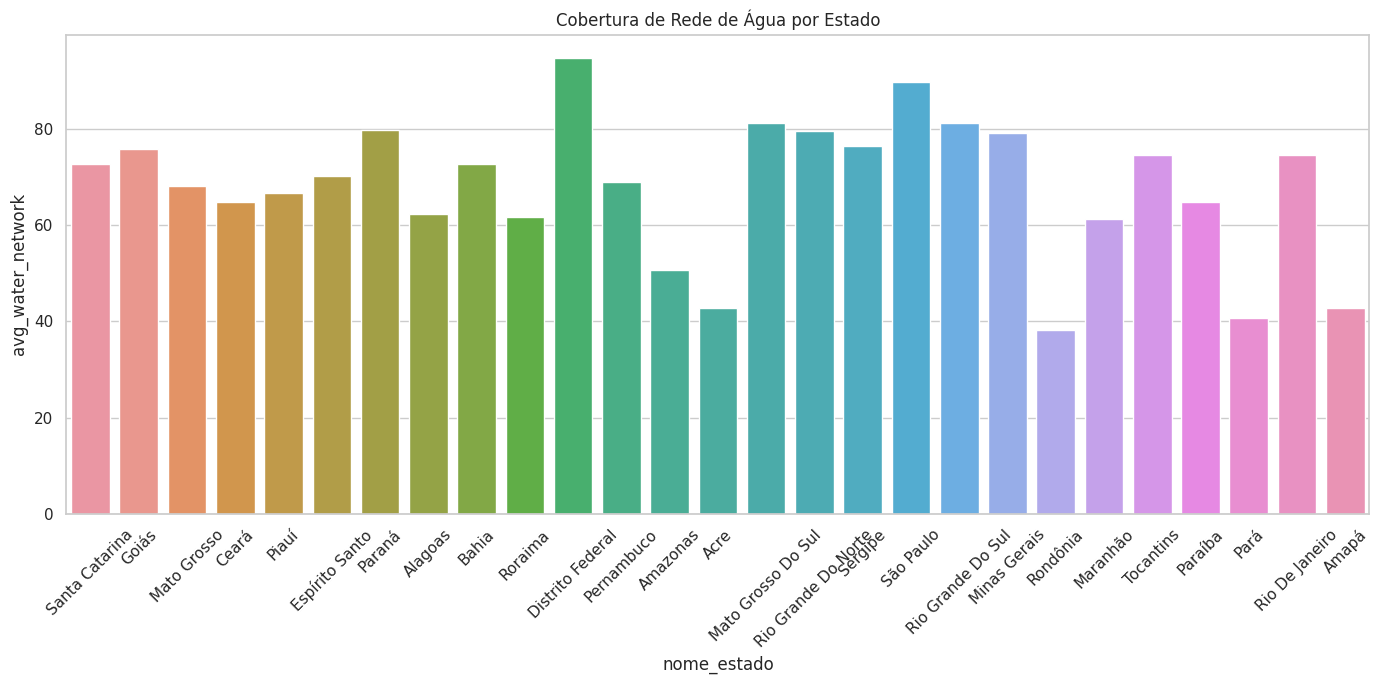

In [ ]:
state_grouped = df.groupby("nome_estado").agg(avg("rede_agua").alias("avg_water_network"))
state_df = state_grouped.toPandas()

plt.figure(figsize=(14,7))
sns.barplot(x="nome_estado", y="avg_water_network", data=state_df)
plt.title("Cobertura de Rede de Água por Estado")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

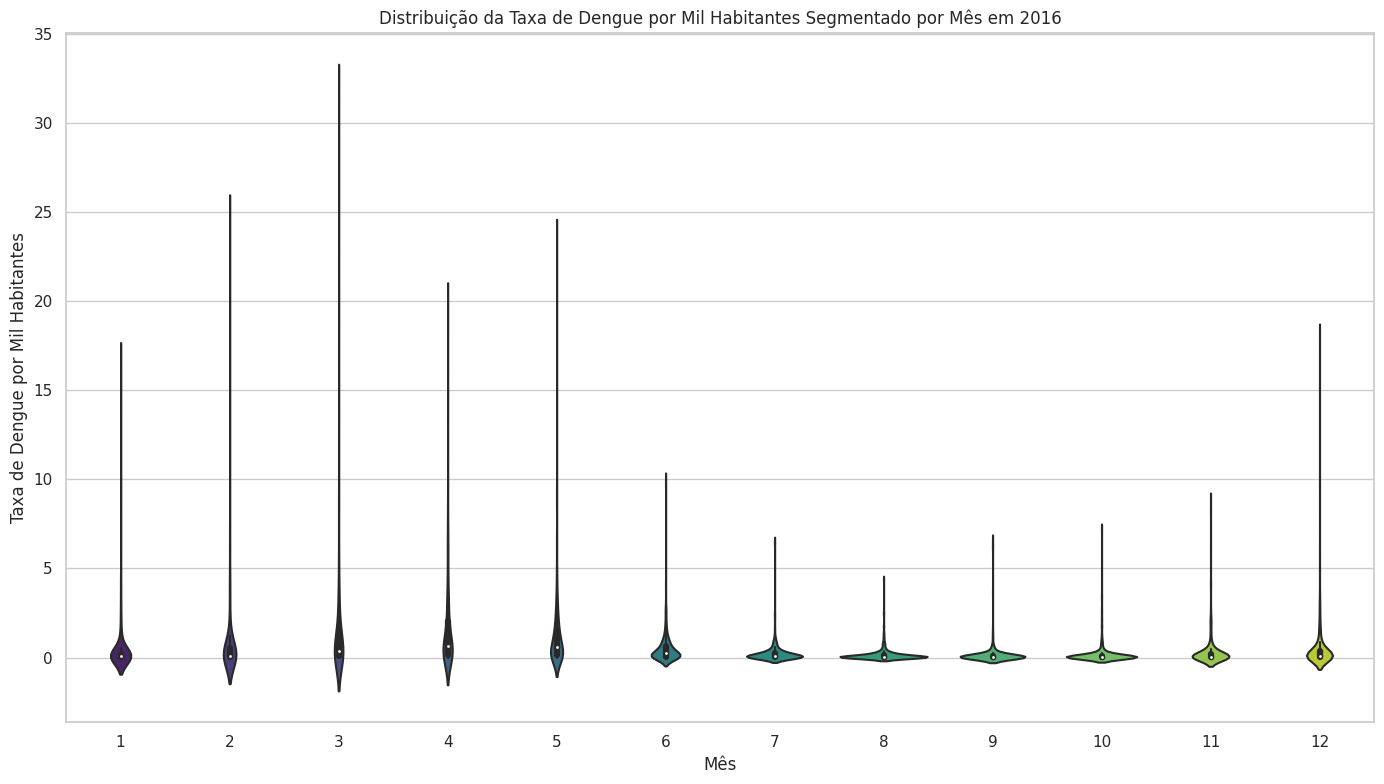

In [ ]:
# Filtrando os dados para o ano de 2016
df_2016 = df_pandas[df_pandas['ano'] == 2015]

plt.figure(figsize=(14, 8))
sns.violinplot(x=df_2016['mes'], y=df_2016['taxa_dengue_per_mil'], palette="viridis")
plt.title('Distribuição da Taxa de Dengue por Mil Habitantes Segmentado por Mês em 2016')
plt.xlabel('Mês')
plt.ylabel('Taxa de Dengue por Mil Habitantes')
plt.tight_layout()
plt.show()

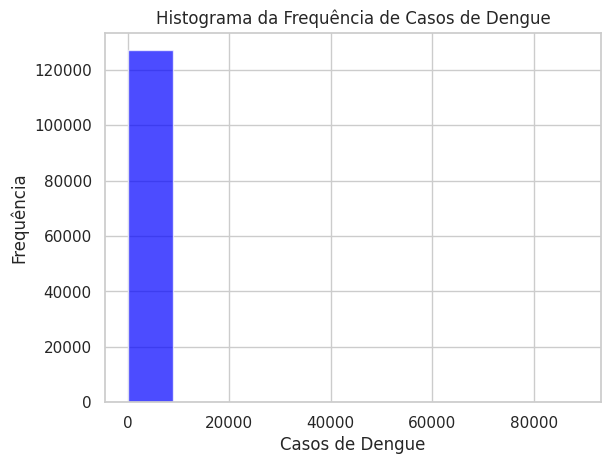

In [ ]:
df_pandas['casos_dengue'].plot(kind='hist', bins=10, color='blue', alpha=0.7)

# Configurações adicionais
plt.xlabel('Casos de Dengue')
plt.ylabel('Frequência')
plt.title('Histograma da Frequência de Casos de Dengue')

# Mostrar o histograma
plt.show()